In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Loading the Dataset

In [56]:
df = pd.read_csv("C:/Users/RAJANYA SARKAR/OneDrive/Desktop/Meri Skills/Project 2 MeriSKILL/Diabetes.csv", header = 0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [57]:
df.shape

(768, 9)

In [58]:
# To show EDD
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Outlier Detection

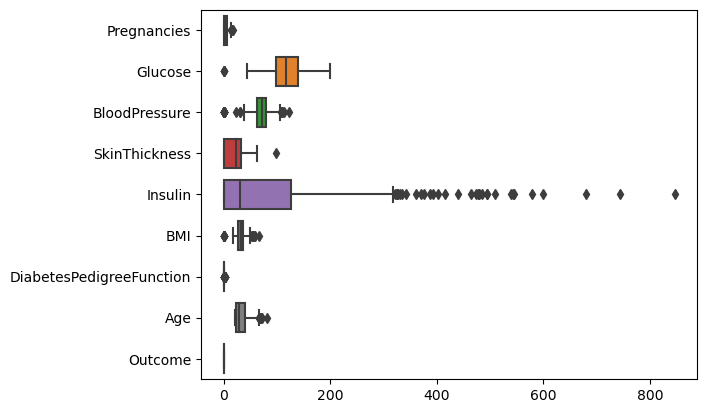

In [59]:
sns.boxplot(data=df, orient = 'h', width=0.7)
plt.show()

In [60]:
df.describe()["Insulin"]

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In the Insulin column, Minimum value = 0.0 Maximum value = 846.0 It is significantly higher than the mean of 79.79 and the 75th percentile is 127.25.

# Treating the Outlier

In [61]:
def Removing_Outliers(df, column):
    Q1 = df[column].quantile(.25)
    Q3 = df[column].quantile(.75)
    IQR = Q3 - Q1
    ub = Q3 + 1.5 * IQR
    lb = Q1 - 1.5 * IQR
    df[column] = np.where(df[column]> ub, ub, df[column])
    df[column] = np.where(df[column]< lb, lb, df[column])
    return df

    

In [62]:
col_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in col_list:
    df = Removing_Outliers(df, col)

In [63]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


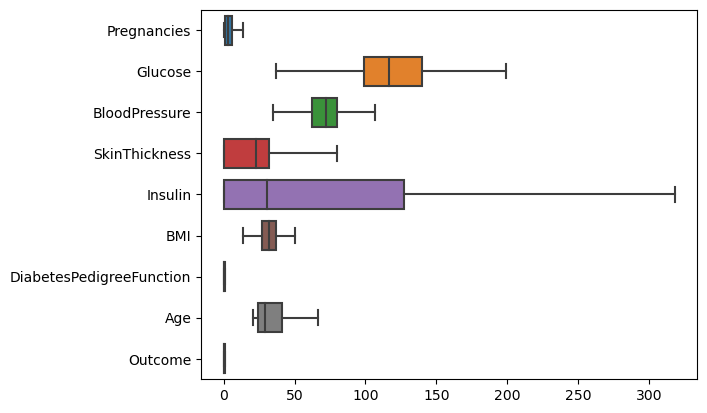

In [64]:
# Outliers are removed
sns.boxplot(data=df, orient = 'h', width=0.7)
plt.show()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [66]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Correlation Matrix

In [68]:
correlation = df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969
Age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702
Outcome,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000


# Visualization of Correlation

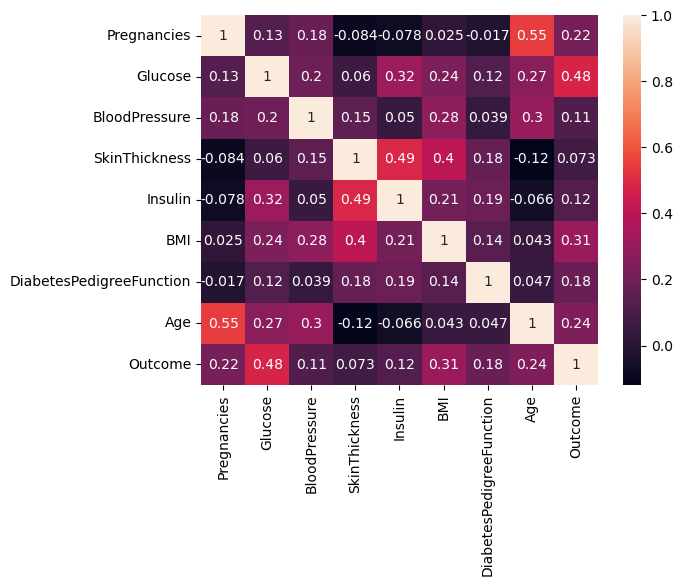

In [69]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# Trainig the model with the help of Train Test split

In [70]:
X = df.drop("Outcome", axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [71]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [72]:
X = pd.DataFrame(X)
X.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647150,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691
1,-0.848970,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304
2,1.245598,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252
3,-0.848970,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828
4,-1.148194,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199
...,...,...,...,...,...,...,...,...
763,1.844045,-0.646072,0.374620,1.735982,1.137221,0.109998,-1.008772,2.564372
764,-0.549746,0.027714,-0.048273,0.409758,-0.787602,0.663583,-0.416642,-0.533513
765,0.347926,-0.004371,0.092691,0.157144,0.410066,-0.841032,-0.749497,-0.275356
766,-0.848970,0.156054,-0.753094,-1.295388,-0.787602,-0.287447,-0.385109,1.187534


In [85]:
Y = df["Outcome"]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8,test_size=0.2, random_state=0)

In [75]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(614, 8) (154, 8) (614,) (154,)


# Training the model

In [76]:
model = LogisticRegression()

In [77]:
model.fit(X_train,Y_train)

LogisticRegression()

In [78]:
coefficients = model.coef_
intercept = model.intercept_

In [79]:
print(coefficients)

[[ 0.29931169  1.07862578 -0.25102055  0.04039354 -0.14605853  0.67393134
   0.32396493  0.24543757]]


In [80]:
print(intercept)

[-0.80745858]


# Prediction

In [81]:
Y_train_pred = model.predict(X_train)
print(Y_train_pred)

[1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1
 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 

In [82]:
Y_test_pred = model.predict(X_test)
print(Y_test_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [83]:
accuracy_test= accuracy_score(Y_test_pred,Y_test)
accuracy_test

0.8181818181818182

In [84]:
cm_test =  confusion_matrix(Y_test_pred,Y_test)
cm_test

array([[97, 18],
       [10, 29]], dtype=int64)